In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
def getbJetTrack(mu = 0, sig = 0.5, decay=3, fracDecay=0.05, fracFlat=0.05):
    r = np.random.rand()
    if (r < fracDecay):
        return np.random.exponential(decay)+np.random.normal(0,0.25)
    elif (r < (fracDecay+fracFlat)):
        return 6 * np.random.random_sample()-3 #get flat -3 to 2
    else:
        return np.random.normal(mu,sig)        

In [184]:
def getLFTrack(mu = 0, sig = 0.5, fracFlat=0.05):
    r = np.random.rand()
    if( r < fracFlat):
        return 6 * np.random.random_sample()-3
    else:        
        return np.random.normal(mu,sig)


In [185]:
def getbJetData(NumData, fracDecay=0.05): #get list of NumData number of elements. 
    DataSet=[]
    for i in range (NumData):
        n = np.random.poisson(4)
        tracks=[]
        for j in range (n):
            tracks.append(getbJetTrack(fracDecay=fracDecay))
        DataSet.append(tracks)
    return DataSet

In [186]:
def getLFJetData(NumData): # get list of NumData number of elements
    DataSet=[]
    for i in range (NumData):
        n = np.random.poisson(2)
        tracks=[]
        for j in range (n):
            tracks.append(getLFTrack())
        DataSet.append(tracks)
    return DataSet

In [187]:
def DataSameLen(listOfLists): # add 0 to the end of stort list elements
    maxLen=0
    for i in listOfLists:
        if len(i)>maxLen:
            maxLen=len(i)
    for i in listOfLists:
        if len(i)<maxLen:
            while(len(i)<maxLen):
                i.append(0)
    return listOfLists


In [188]:
def getData(NumData): #combines B jet data and LF jet data, NumData: number of data in each, adds indicator at the front
    bj=getbJetData(NumData) #only train uses this
    j=0
    for i in bj:
        bj[j] = [True] + i
        j+=1
    lfj=getLFJetData(NumData)
    k=0
    for i in lfj:
        lfj[k] = [False] + i
        k+=1
    for j in lfj:
        bj.append(j)
    return DataSameLen(bj)

In [189]:
def dist(elem_train, elem_test): 
    d=0.0
    for i in range(1, len(elem_train)):
        d+=(elem_train[i]-elem_test[i-1])**2
    return np.sqrt(d)

def getNbors(train, elem_test, k):
    distance=[]
    for elem in train:
        distance.append([elem,dist(elem,elem_test)])
    distance.sort(key = lambda ls : ls[1])
    nbors=[]
    for i in range(k):
        nbors.append(distance[i][0])
    return nbors

def BjetProb(train, elem_test, k):
    neigbors=getNbors(train,elem_test,k)
    numTrue=0
    for i in neigbors:
        if (i[0]==True):
            numTrue+=1
    return float(numTrue)/float(len(neigbors))

# Plot the Data

In [190]:
def flatten(inData): 
    dataFlat = np.array([])
    for jet in inData:
        dataFlat = np.append(dataFlat,jet)
    return dataFlat

In [191]:
nEvents = 10000

bj=getbJetData(nEvents, fracDecay=0.2) #only train uses this
bjFlat = flatten(bj)

lf=getLFJetData(nEvents)
lfFlat = flatten(lf)

print(f"{len(bjFlat)} vs {len(lfFlat)}")

40090 vs 19955


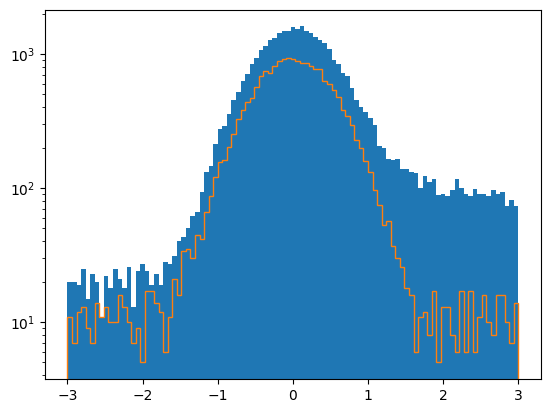

In [192]:
bins = np.linspace(-3,3,100)
plt.hist(bjFlat,bins=bins)
plt.hist(lfFlat,bins=bins,histtype="step")

plt.yscale("log")
plt.show()

In [193]:
n=1000
train = getData(n)
bj_test=getbJetData(n)
lf_test=getLFJetData(n)
DataSameLen(bj_test)
DataSameLen(lf_test)

if (len(bj_test[0])<len(train[0])-1):
    for i in bj_test:
        while(len(i)<len(train[0])-1):
            i.append(0)
if (len(lf_test[0])<len(train[0])-1):
    for i in lf_test:
        while(len(i)<len(train[0])-1):
            i.append(0)
#print(test)
b_prob=[]
lf_prob=[]
for i in bj_test:
    b_prob.append(BjetProb(train,i,100))
for i in lf_test:
    lf_prob.append(BjetProb(train,i,100))

(array([143.,  12.,  59.,  84.,  95.,  63.,  50.,  72.,  65.,  64.,  47.,
         36.,  38.,  43.,  41.,  32.,  19.,  17.,   8.,   2.,   5.,   2.,
          2.,   0.,   1.]),
 array([0.11  , 0.1392, 0.1684, 0.1976, 0.2268, 0.256 , 0.2852, 0.3144,
        0.3436, 0.3728, 0.402 , 0.4312, 0.4604, 0.4896, 0.5188, 0.548 ,
        0.5772, 0.6064, 0.6356, 0.6648, 0.694 , 0.7232, 0.7524, 0.7816,
        0.8108, 0.84  ]),
 [<matplotlib.patches.Polygon at 0x118391460>])

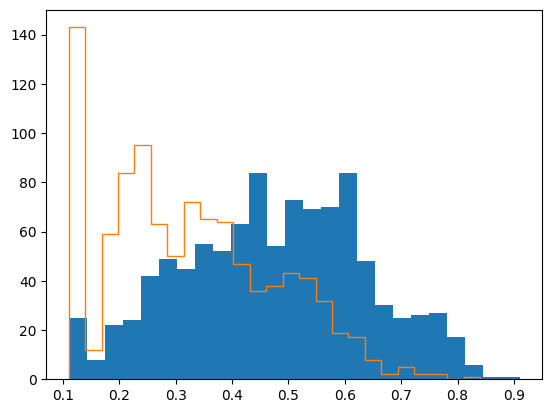

In [194]:
plt.hist(b_prob, bins=25)
plt.hist(lf_prob, bins=25, histtype="step")